In [1]:
from sympy import symbols, Matrix, vector, exp, diff, solve
from sympy.vector import gradient
import numpy as np
from numpy.linalg import norm
from numpy import gradient 
from matplotlib import pyplot as plt

In [2]:
# Problem 1a

# Vars
x1, x2 = symbols('x1 x2', real=True)

# Hessian
H = Matrix([
    [1200*x1**2 - 400*x2 + 2, -400*x1],
    [-400*x1,               200      ]
])

# Compute eigenvals
eigenvals = H.eigenvals()

print("Eigenvalues of H")
for i, val in enumerate(eigenvals, start=1):
    print(f"Lambda {i} = {val}")

def compute_at_stationary_point(x1,x2):
    H = Matrix([
    [1200*x1**2 - 400*x2 + 2, -400*x1],
    [-400*x1,               200      ]
])
    # Compute eigenvals
    eigenvalues = H.eigenvals()
    for i, val in enumerate(eigenvalues, start=1):
        print(f"Lambda {i} = {float(val)}")


print("Eigenvalues of H(x1*,x2*)")
compute_at_stationary_point(1,1)

Eigenvalues of H
Lambda 1 = 600*x1**2 - 200*x2 - sqrt(360000*x1**4 - 240000*x1**2*x2 + 41200*x1**2 + 40000*x2**2 + 39600*x2 + 9801) + 101
Lambda 2 = 600*x1**2 - 200*x2 + sqrt(360000*x1**4 - 240000*x1**2*x2 + 41200*x1**2 + 40000*x2**2 + 39600*x2 + 9801) + 101
Eigenvalues of H(x1*,x2*)
Lambda 1 = 0.39936076748763305
Lambda 2 = 1001.6006392325123


In [3]:
# Problem 1c Gradient Vector
x1, x2 = symbols('x1 x2')

f = exp(x1 + x2) + (x1 - x2)**2

# Gradient vector
grad_f = Matrix([
    diff(f, x1),  
    diff(f, x2)   
])

print("Grad f:")
grad_f

Grad f:


Matrix([
[ 2*x1 - 2*x2 + exp(x1 + x2)],
[-2*x1 + 2*x2 + exp(x1 + x2)]])

In [4]:
# Problem 1c Solving for Stationary Points

# This will throw an error because there are no solutions to x1 and x2
print("Solution:")
print(solve(grad_f, (x1,x2)))

Solution:


NotImplementedError: could not solve exp(2*x2 - LambertW(-exp(2*x2)/2)) - 2*LambertW(-exp(2*x2)/2)

In [5]:
### PYTHON PROBLEM SECTION ###
# Problem 3a and 3b

# Q Function
def Q(x, i):
    return np.exp(-0.5 * norm(x[i])**2)

# Objective function
def f(x, mu1, mu2, xstart, xtarget):
    start_target = mu1 * (norm(x[0] - xstart)**2 + norm(x[23] - xtarget)**2)
    hill_avoid = (mu2 / 23) * sum(Q(x, i) for i in range(24)) 
    velocity_term = 23 * sum(norm(x[i+1] - x[i])**2 for i in range(23))
    
    return start_target + hill_avoid + velocity_term

# Gradient of f(x)
def grad_f(x, mu1, mu2, xstart, xtarget):
    grad = np.zeros((24,2))
    for j in range(0, 24):
        if j==0:
            grad[j] = 2 * mu1 * (x[j] - xstart) - ((x[j]*mu2)/23) * Q(x, j)  - 46 * (x[1] - x[j])
        elif j==23:
            grad[j] = 2 * mu1 * (x[j] - xtarget) - ((x[j]*mu2)/23) * Q(x, j)  + 46 * (x[j] - x[22])
        else:
            grad[j] = - ((x[j]*mu2)/23) * Q(x, j) + 46 * (2*x[j] - x[j-1] - x[j+1])
    return grad

In [15]:
# Problem 3c
mu1=100
mu2=100
xstart = np.array([-2,-2])
xtarget = np.array([2,2])
np.random.seed(42)
x = np.random.rand(24,2)
a = .0001
for _ in range(10000):
    x = x - a * grad_f(x, mu1, mu2, xstart, xtarget)
    
print(x)



[[-1.96089856e+00 -1.94735278e+00]
 [-1.78730206e+00 -1.71457716e+00]
 [-1.60839966e+00 -1.47513564e+00]
 [-1.42007667e+00 -1.22434735e+00]
 [-1.21532378e+00 -9.55747112e-01]
 [-9.84664990e-01 -6.62523064e-01]
 [-7.19061230e-01 -3.41611017e-01]
 [-4.17170372e-01 -9.17188931e-04]
 [-9.39636129e-02  3.36042164e-01]
 [ 2.22345217e-01  6.39923189e-01]
 [ 5.07656859e-01  8.93753096e-01]
 [ 7.52284560e-01  1.09718555e+00]
 [ 9.57416634e-01  1.25843911e+00]
 [ 1.12870210e+00  1.38720242e+00]
 [ 1.27253525e+00  1.49177126e+00]
 [ 1.39465046e+00  1.57853172e+00]
 [ 1.49978528e+00  1.65221105e+00]
 [ 1.59171587e+00  1.71625051e+00]
 [ 1.67338714e+00  1.77311782e+00]
 [ 1.74704729e+00  1.82453637e+00]
 [ 1.81436597e+00  1.87164945e+00]
 [ 1.87653688e+00  1.91514219e+00]
 [ 1.93437083e+00  1.95533855e+00]
 [ 1.98838436e+00  1.99228510e+00]]


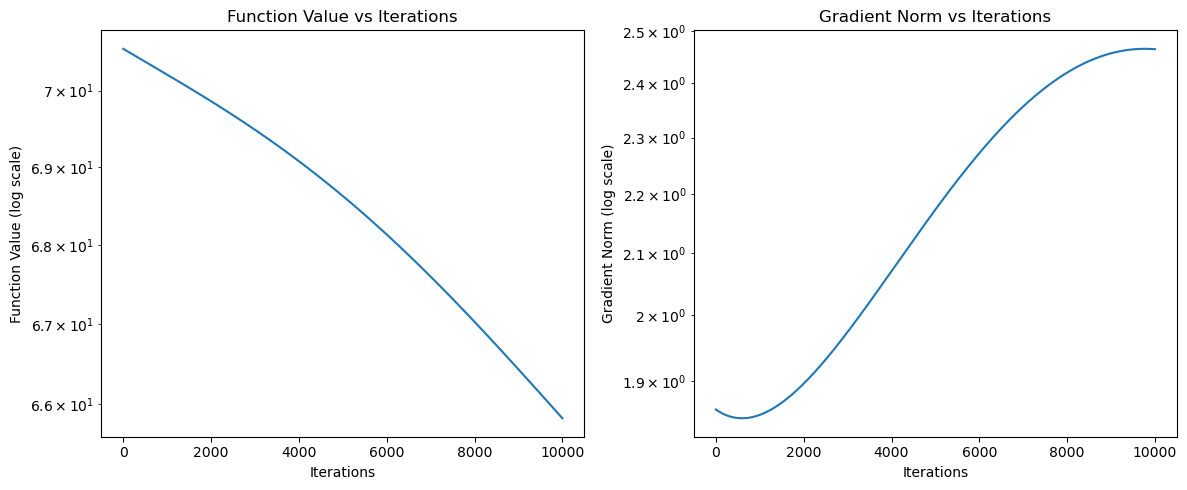

In [16]:
# Problem 3d
f_values = []
grad_norms = []

for _ in range(10000):
    current_f = f(x, mu1, mu2, xstart, xtarget)
    current_grad = grad_f(x, mu1, mu2, xstart, xtarget)
    
    f_values.append(current_f)
    grad_norms.append(norm(current_grad))
    
    x = x - a * current_grad

plt.figure(figsize=(12, 5))

# Plot 1: Function vals
plt.subplot(1, 2, 1)
plt.plot(f_values)
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Function Value (log scale)')
plt.title('Function Value vs Iterations')

# Plot 2: Gradient norms
plt.subplot(1, 2, 2)
plt.plot(grad_norms)
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Gradient Norm (log scale)')
plt.title('Gradient Norm vs Iterations')

plt.tight_layout()
plt.show()


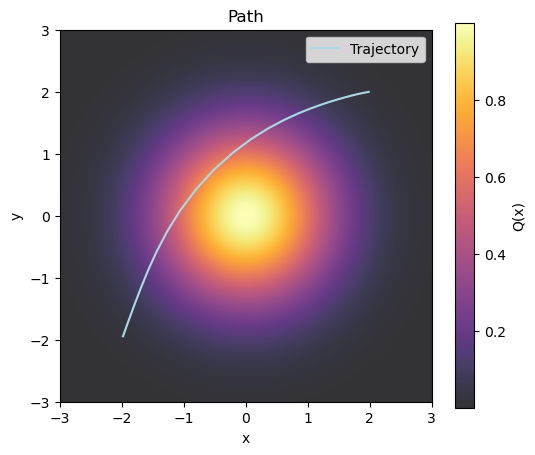

In [ ]:

# Problem 3e
# Set up grid space and Q(X)
grid_x = np.linspace(-3, 3, 200)
grid_y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(grid_x, grid_y)
Q = np.exp(-0.5 * (X**2 + Y**2))  # same shape as X, Y


plt.figure(figsize=(6,5))

# Plotting Q
plt.imshow(Q, extent=[-3,3,-3,3], origin='lower', cmap='inferno', alpha=0.8)
plt.colorbar(label='Q(x)')

# Plotting trajectory
plt.plot(x[:,0], x[:,1], 'lightblue', label='Trajectory')

plt.title('Path')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()